# Final Project: House Sales in King County, USA
This notebook contains solutions to the questions listed in the project.
Each task is addressed in a separate code cell, followed by outputs where applicable.

### Task 1: Display Data Types
Display the data types of each column using the `dtypes` attribute.

In [11]:
import os
import pandas as pd

# Load the dataset (Ensure the dataset file is in the same directory as this notebook)
data = pd.read_csv(os.path.join(os.path.abspath(""), "data", "kc_house_data.csv"))

# Display data types
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### Task 2: Drop Columns and Describe Data
Drop the columns `id` and `Unnamed: 0` and use `describe()` to get a statistical summary.

In [6]:
# Drop the specified columns
data.drop(['id', 'Unnamed: 0'], axis=1, inplace=True)

# Get statistical summary
data.describe()

KeyError: "['Unnamed: 0'] not found in axis"

### Task 3: Count Unique Floor Values
Count the number of houses with unique floor values using `value_counts()` and convert it to a DataFrame.

In [7]:
# Count unique floor values and convert to DataFrame
floor_counts = data['floors'].value_counts().to_frame()
floor_counts

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


### Task 4: Boxplot for Waterfront and Price Outliers
Use Seaborn's `boxplot` function to determine whether houses with or without a waterfront view have more price outliers.

Matplotlib is building the font cache; this may take a moment.


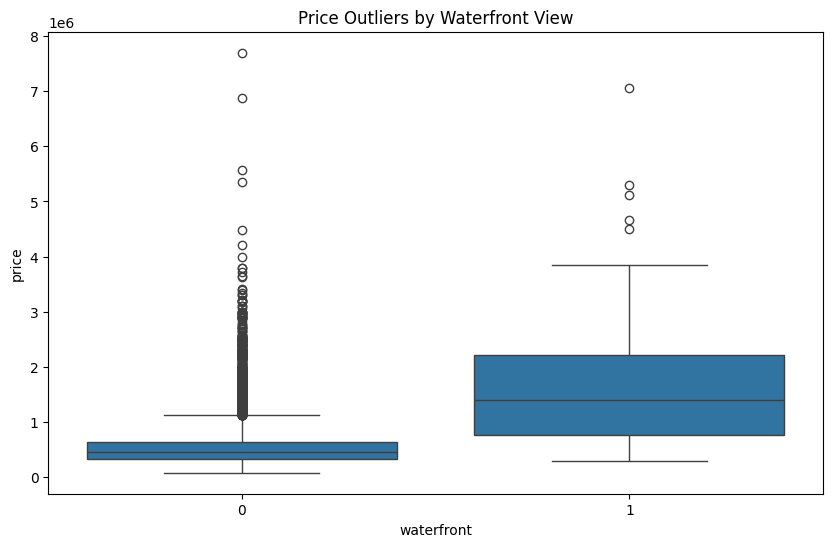

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='waterfront', y='price', data=data)
plt.title('Price Outliers by Waterfront View')
plt.show()

### Task 5: Correlation Between `sqft_above` and `price`
Use Seaborn's `regplot` to visualize the correlation.

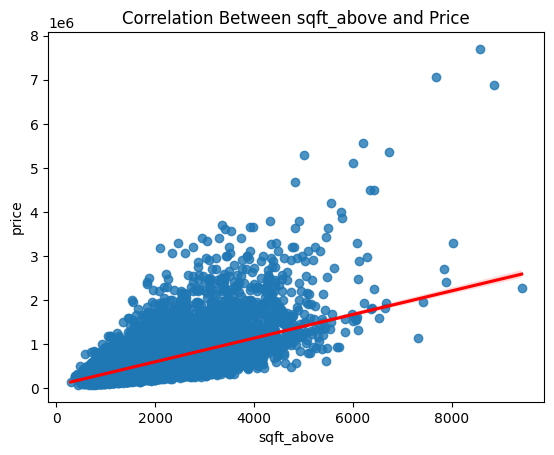

In [9]:
# Create a regression plot
sns.regplot(x='sqft_above', y='price', data=data, line_kws={'color': 'red'})
plt.title('Correlation Between sqft_above and Price')
plt.show()

In [14]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Prepare the data
X = data[['sqft_living']]  # Feature
y = data['price']          # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and calculate R^2
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f'R^2 value: {r2}')


R^2 value: 0.5033019006466926


In [ ]:
features = [
    "floors",
    "waterfront",
    "lat",
    "bedrooms",
    "sqft_basement",
    "view",
    "bathrooms",
    "sqft_living15",
    "sqft_above",
    "grade",
    "sqft_living",
]
X = data[features]  # Features
y = data["price"]  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"R^2 value: {r2}")

R^2 value: 0.6461378773116289


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score

pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("polynomial", PolynomialFeatures(degree=2)),
        ("model", LinearRegression()),
    ]
)

pipeline.fit(X_train, y_train)

# Predict and calculate R^2
y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"R^2 value: {r2}")

R^2 value: 0.7635938325380462


In [23]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Predict and calculate R^2
y_pred = ridge_model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f'R^2 value: {r2}')

R^2 value: 0.6460194468601681


In [24]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and fit the Ridge regression model
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_poly, y_train)

# Predict and calculate R^2
y_pred = ridge_model.predict(X_test_poly)
r2 = r2_score(y_test, y_pred)

print(f'R^2 value: {r2}')

R^2 value: 0.7546208821966904
